C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6620/2438422570.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_m=df.fillna(df.mean())


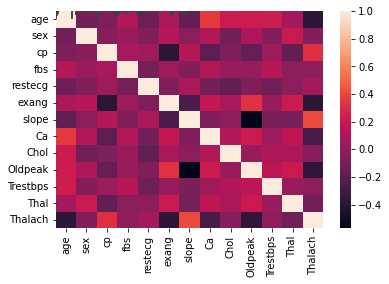

In [4]:
import pandas as pd

from scipy.stats.mstats import winsorize

df= pd.read_csv('dataset.csv',header=None, names=["age", "sex", "cp", "trestbps", 
                                                  "chol", "fbs", "restecg", "thalach", 
                                                  "exang", "oldpeak", "slope", "ca", 
                                                  "thal", "target"], na_values=['?'])
df = df.replace('?','NaN')
df['thal']=pd.to_numeric(df['thal'], errors='coerce')
df['ca']=pd.to_numeric(df['ca'], errors='coerce')

df_m=df.fillna(df.mean())


df_m['slope'] = pd.to_numeric(df_m['slope'], errors='coerce')
df_m['age'] = pd.to_numeric(df_m['age'], errors='coerce')
df_m['sex'] = pd.to_numeric(df_m['sex'], errors='coerce')
df_m['fbs'] = pd.to_numeric(df_m['fbs'], errors='coerce')
df_m['exang'] = pd.to_numeric(df_m['exang'], errors='coerce')
df_m['cp'] = pd.to_numeric(df_m['cp'], errors='coerce')

df_m['trestbps'] = pd.to_numeric(df_m['trestbps'], errors='coerce')
df_m['chol'] = pd.to_numeric(df_m['chol'], errors='coerce')
df_m['thalach'] = pd.to_numeric(df_m['thalach'], errors='coerce')
df_m['oldpeak'] = pd.to_numeric(df_m['oldpeak'], errors='coerce')
df_m['restecg'] = pd.to_numeric(df_m['restecg'], errors='coerce')
df_m['target'].replace(to_replace=[1, 2, 3, 4], value=1, inplace=True)

df_m = df_m.iloc[1: , :]
import seaborn as sns
sns.boxplot(x=df_m['ca'])

df_m['Ca']=winsorize(df_m['ca'],limits=[0.0,0.25])
df_m.drop("ca", axis=1, inplace=True) 
sns.boxplot(x=df_m['Ca'])

sns.boxplot(x=df_m['chol'])

df_m['Chol']=winsorize(df_m['chol'],limits=[0.0,0.25])
sns.boxplot(x=df_m['Chol'])
df_m.drop("chol", axis=1, inplace=True) 

sns.boxplot(x=df_m['oldpeak'])

df_m['Oldpeak']=winsorize(df_m['oldpeak'],limits=[0.03,0.05])
sns.boxplot(x=df_m['Oldpeak'])
df_m.drop("oldpeak", axis=1, inplace=True) 

#Box Plot
sns.boxplot(x=df_m['trestbps'])

# Winsorization
df_m['Trestbps']=winsorize(df_m['trestbps'],limits=[0.0,0.25])
sns.boxplot(x=df_m['Trestbps'])
df_m.drop("trestbps", axis=1, inplace=True) 

sns.boxplot(x=df_m['thal'])

df_m['Thal']=winsorize(df_m['thal'],limits=[0.03,0.05])
sns.boxplot(x=df_m['Thal'])
df_m.drop("thal", axis=1, inplace=True) 


sns.boxplot(x=df_m['thalach'])

df_m['Thalach']=winsorize(df_m['thalach'],limits=[0.03,0.05])
sns.boxplot(x=df_m['Thalach'])
df_m.drop("thalach", axis=1, inplace=True) 

import matplotlib.pyplot as plt

heat_map = sns.heatmap(df_m.corr())

plt.show()


In [3]:

#### Decision Tree Classifier ####


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn import metrics

feature_cols = ["age", "sex", "cp", "Trestbps", "Chol", "fbs", "restecg", "Thalach", "exang", "Oldpeak", "slope", "Ca", "Thal"]
X = df_m[feature_cols] 
y = df_m.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

print(df_m)

y_pred = clf.predict(X_test)
print("\n\n->Decision Tree Classifier<-")
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))


#### Logistic Regression ####


from sklearn.linear_model import LogisticRegression 


feature_cols = ["age", "sex", "cp", "Trestbps", "Chol", "fbs", "restecg", "Thalach", "exang", "Oldpeak", "slope", "Ca", "Thal"]
x = df_m[feature_cols] 
y = df_m.target 

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 0) 

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 

#print (xtrain[0:10, :]) 



classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest) 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("\nConfusion Matrix : \n", cm) 

from sklearn.metrics import accuracy_score 
print("\n\n->Logistic Regression<-")

print ("\nAccuracy : ", accuracy_score(ytest, y_pred))


#### Random Forest ####


feature_cols = ["age", "sex", "cp", "Trestbps", "Chol", "fbs", "restecg", "Thalach", "exang", "Oldpeak", "slope", "Ca", "Thal"]
X = df_m[feature_cols] 
y = df_m.target 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("\n\n->Random Forest<-")
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))


#### Naive Bayes####
# Import LabelEncoder
from sklearn import preprocessing



feature_cols = ["age", "sex", "cp", "Trestbps", "Chol", "fbs", "restecg", "Thalach", "exang", "Oldpeak", "slope", "Ca", "Thal"]
X = df_m[feature_cols] 
y = df_m.target 


# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=109) # 70% training and 30% test
#Import Gaussian Naive Bayes model


from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild
#print("Predicted Value:", y_pred)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("\n\n->Naive Bayes<-")
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))

       age  sex   cp  fbs  restecg  exang  slope target   Ca   Chol  Oldpeak  \
1     52.0  1.0  0.0  0.0      1.0    0.0    2.0      0  1.0  212.0      1.0   
2     53.0  1.0  0.0  1.0      0.0    1.0    0.0      0  0.0  203.0      3.1   
3     70.0  1.0  0.0  0.0      1.0    1.0    0.0      0  0.0  174.0      2.6   
4     61.0  1.0  0.0  0.0      1.0    0.0    2.0      0  1.0  203.0      0.0   
5     62.0  0.0  0.0  1.0      1.0    0.0    1.0      0  1.0  275.0      1.9   
...    ...  ...  ...  ...      ...    ...    ...    ...  ...    ...      ...   
1324  57.0  0.0  0.0  0.0      1.0    1.0    1.0      0  0.0  241.0      0.2   
1325  45.0  1.0  3.0  0.0      1.0    0.0    1.0      0  0.0  264.0      1.2   
1326  68.0  1.0  0.0  1.0      1.0    0.0    1.0      0  1.0  193.0      3.4   
1327  57.0  1.0  0.0  0.0      1.0    1.0    1.0      0  1.0  131.0      1.2   
1328  57.0  0.0  1.0  0.0      0.0    0.0    1.0      0  1.0  236.0      0.0   

      Trestbps  Thal  Thalach  
1      